In [120]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

### Reading Chicago Crime Dataset

In [121]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [122]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

### Data Preprocessing

In [124]:
# Remove NaN Value (As Dataset is huge, the NaN rows can be neglected)  
df = df.dropna()

In [125]:
df.shape

(1418365, 23)

In [126]:
# As the dataset is too large, we have subsampled it for modelling as proof of concept
df = df.sample(n=350000, random_state=10)


In [127]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350000 entries, 1260040 to 115332
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  350000 non-null  object 
 1   Block                 350000 non-null  object 
 2   IUCR                  350000 non-null  object 
 3   Primary Type          350000 non-null  object 
 4   Description           350000 non-null  object 
 5   Location Description  350000 non-null  object 
 6   Arrest                350000 non-null  bool   
 7   Domestic              350000 non-null  bool   
 8   Beat                  350000 non-null  int64  
 9   District              350000 non-null  float64
 10  Ward                  350000 non-null  float64
 11  Community Area        350000 non-null  float64
 12  FBI Code              350000 non-null  object 
 13  X Coordinate          350000 non-null  float64
 14  Y Coordinate          350000 non-null  float64

In [128]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1260040,004XX S CLINTON ST,0820,THEFT,$500 AND UNDER,STREET,False,False,121,1.0,2.0,...,1898242.0,2016,41.876212,-87.641007,"(41.8762118, -87.641006667)",4,6,19,0,0
1203295,006XX N RUSH ST,1330,CRIMINAL TRESPASS,TO LAND,COMMERCIAL / BUSINESS OFFICE,False,False,1834,18.0,42.0,...,1904895.0,2016,41.894374,-87.625439,"(41.894374327, -87.625439441)",1,9,4,30,0
575603,021XX W 19TH ST,0560,ASSAULT,SIMPLE,OTHER,False,False,1234,12.0,25.0,...,1890719.0,2013,41.855794,-87.679711,"(41.855793593, -87.679710534)",7,19,8,20,0
950048,080XX S WABASH AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,623,6.0,6.0,...,1851748.0,2014,41.748509,-87.622933,"(41.748509119, -87.62293258)",11,13,14,40,0
1268578,045XX N SHERIDAN RD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,1914,19.0,46.0,...,1930493.0,2016,41.964798,-87.654782,"(41.964798032, -87.65478194)",2,14,10,30,0


In [129]:
#Block
# Convert Categorical Attributes to Numerical
BlockSeries = df['Block']
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [78]:
df

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1260040,0,0,THEFT,0,0,False,False,121,1.0,2.0,...,1898242.0,2016,41.876212,-87.641007,0,4,6,19,0,0
1203295,1,1,CRIMINAL TRESPASS,1,1,False,False,1834,18.0,42.0,...,1904895.0,2016,41.894374,-87.625439,1,1,9,4,30,0
575603,2,2,ASSAULT,2,2,False,False,1234,12.0,25.0,...,1890719.0,2013,41.855794,-87.679711,2,7,19,8,20,0
950048,3,3,BURGLARY,3,3,False,False,623,6.0,6.0,...,1851748.0,2014,41.748509,-87.622933,3,11,13,14,40,0
1268578,4,4,CRIMINAL DAMAGE,4,4,False,True,1914,19.0,46.0,...,1930493.0,2016,41.964798,-87.654782,4,2,14,10,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240500,15669,47,WEAPONS VIOLATION,44,0,True,False,634,6.0,21.0,...,1843143.0,2016,41.724908,-87.625145,133712,4,19,11,59,0
535052,4608,26,MOTOR VEHICLE THEFT,25,0,False,False,1132,11.0,24.0,...,1895744.0,2013,41.869826,-87.723890,170333,6,4,17,30,0
1181866,8187,9,THEFT,9,26,False,False,2232,22.0,34.0,...,1836553.0,2015,41.706926,-87.642046,11116,12,12,9,28,0
189404,7899,36,THEFT,34,0,False,False,1114,11.0,28.0,...,1901150.0,2012,41.884674,-87.726099,120809,5,11,11,30,0


In [130]:
BlockSeries

1260040         004XX S CLINTON ST
1203295            006XX N RUSH ST
575603             021XX W 19TH ST
950048          080XX S WABASH AVE
1268578        045XX N SHERIDAN RD
                    ...           
1240500      093XX S LAFAYETTE AVE
535052       039XX W ARTHINGTON ST
1181866           007XX W 103RD ST
189404         040XX W MAYPOLE AVE
115332     029XX N SPRINGFIELD AVE
Name: Block, Length: 350000, dtype: object

## Feature Selection: 
##### Looking for correlation between features

<AxesSubplot:>

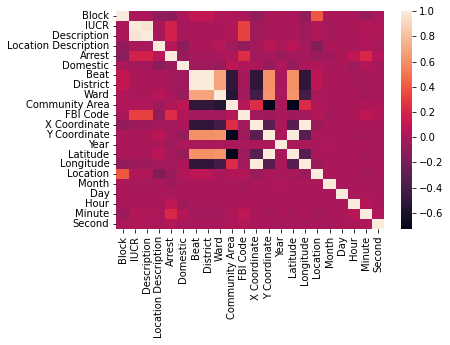

In [79]:
corr=df.corr()
sns.heatmap(corr,  xticklabels=True, yticklabels=True)


In [80]:
#We see that there is high correlation between Longitude & x-coordinate and Latitude & x-coordinate

## Exploratory Data Analysis

#### Visualizing number of crimes reported per year

In [81]:
total_crimes_in_every_year = df.groupby('Year')['Primary Type'].count()
total_crimes_in_every_year = total_crimes_in_every_year.to_frame()
total_crimes_in_every_year.rename(columns = {"Primary Type": "Total Crimes"}, inplace = True) 
total_crimes_in_every_year.reset_index(inplace = True)
n = total_crimes_in_every_year['Total Crimes'].idxmax()
year = total_crimes_in_every_year.iloc[n][0]
number_of_crimes = total_crimes_in_every_year.iloc[n][1]
print(year)
print(number_of_crimes)

2012
82602


In [82]:
total_crimes_in_every_year

,Year,Total Crimes
0,2012,82602
1,2013,74800
2,2014,66523
3,2015,64258
4,2016,61808
5,2017,9


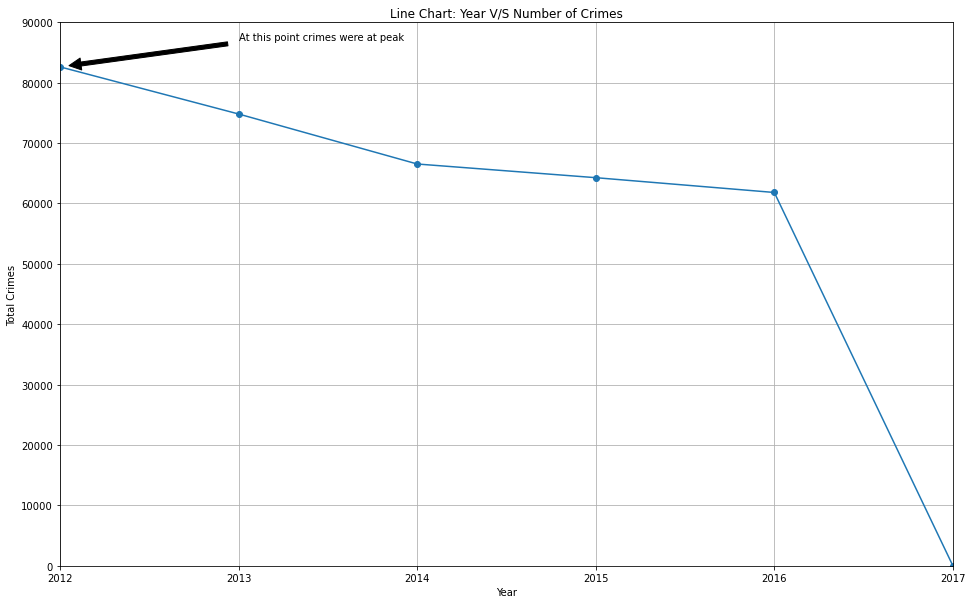

In [83]:
import matplotlib.pyplot as plt
year = total_crimes_in_every_year['Year']
total_crimes = total_crimes_in_every_year['Total Crimes']
plt.figure(figsize=(16,10))
plt.plot(year, total_crimes, marker = 'o', label = 'Total Crimes')
plt.title("Line Chart: Year V/S Number of Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.axis([2012, 2017, 0, 90000])
plt.annotate('At this point crimes were at peak',
xy=(2012, 82602), xytext=(2013, 87000), arrowprops=dict(facecolor='black',
shrink=0.05))
plt.grid()
plt.show()

#### Visualizing number of arrests done per year

In [84]:
# total number of arrests are done
total_arrests = sum(df['Arrest'] == True)
print('Total No.of arrests are '+str(total_arrests))
# arrest in every year
arrest_data = df[df['Arrest'] == True]
total_arrest_in_every_year = arrest_data.groupby('Year')['Arrest'].count()
total_arrest_in_every_year = total_arrest_in_every_year.to_frame()
total_arrest_in_every_year.reset_index(inplace = True)
total_arrest_in_every_year

Total No.of arrests are 91567


,Year,Arrest
0,2012,22404
1,2013,21155
2,2014,19253
3,2015,16894
4,2016,11861


In [85]:
#Adding a new row 2017 and setting it to 0, as fo plotting purposes both crimes & arrests must have the same dimension
df2 = {'Year': 2017, 'Arrest': 0}
total_arrest_in_every_year = total_arrest_in_every_year.append(df2, ignore_index = True)

In [86]:
total_arrest_in_every_year

,Year,Arrest
0,2012,22404
1,2013,21155
2,2014,19253
3,2015,16894
4,2016,11861
5,2017,0


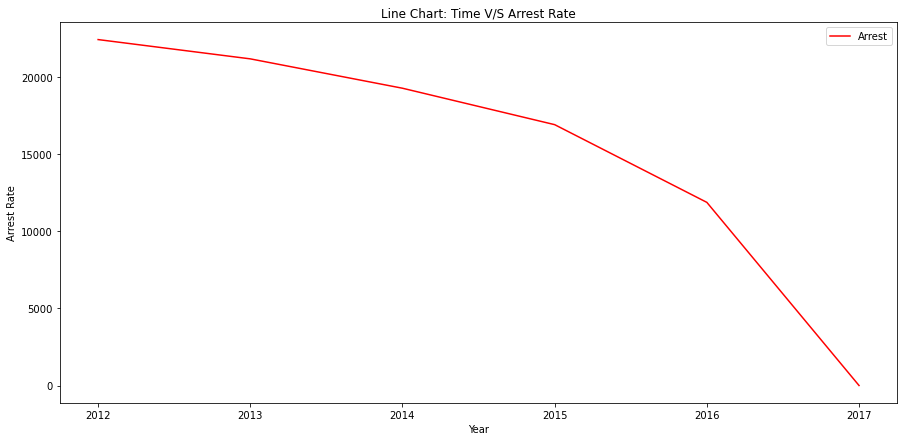

In [87]:
total_arrest_in_every_year.plot(kind = 'line', x = 'Year', y = 'Arrest', figsize=(15,7), color = 'r')
plt.title("Line Chart: Time V/S Arrest Rate")
plt.xlabel("Year")
plt.ylabel("Arrest Rate")
plt.show()

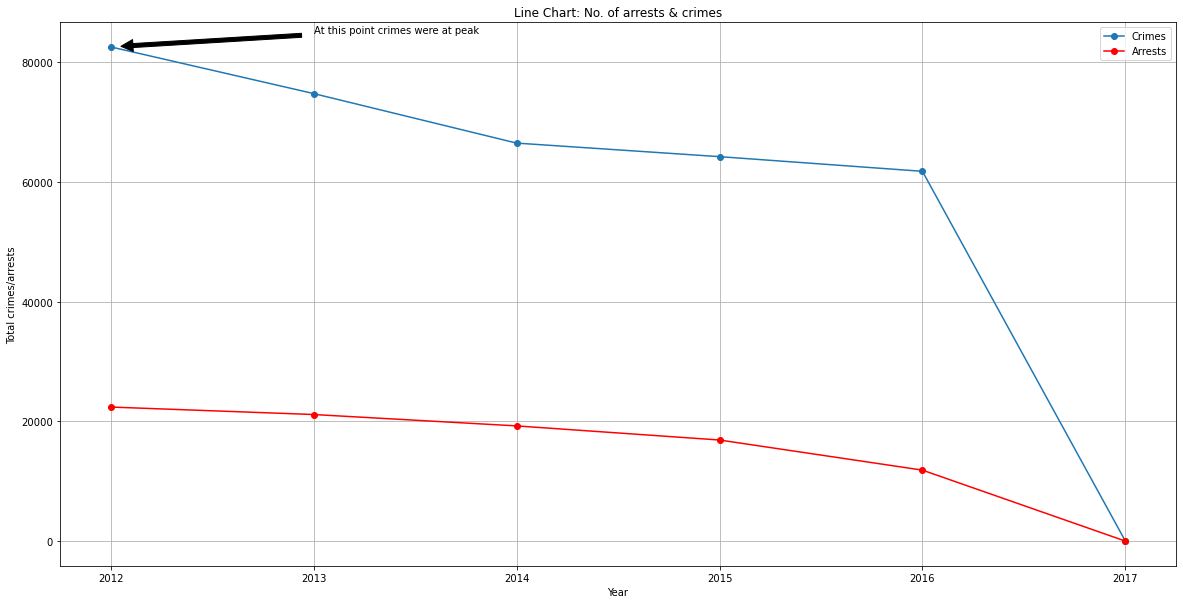

In [88]:
import matplotlib.pyplot as plt
date = total_arrest_in_every_year['Year']
arrests = total_arrest_in_every_year['Arrest']
crimes = total_crimes_in_every_year['Total Crimes']
plt.figure(figsize=(20,10))
plt.plot(date, crimes, marker = 'o', label = 'Crimes')
plt.plot(date, arrests, marker = 'o', color = 'r', label = 'Arrests')
labels = ['Crimes', 'Arrests']
#cubes = [i*i*i for i in numbers]
#plt.plot(numbers, cubes, marker = 'o')
plt.annotate('At this point crimes were at peak',
xy=(2012, 82602), xytext=(2013, 85000), arrowprops=dict(facecolor='black',
shrink=0.05))
plt.title("Line Chart: No. of arrests & crimes")
plt.xlabel("Year")
plt.ylabel("Total crimes/arrests")
plt.grid()
plt.legend(labels)
plt.show()

In [89]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


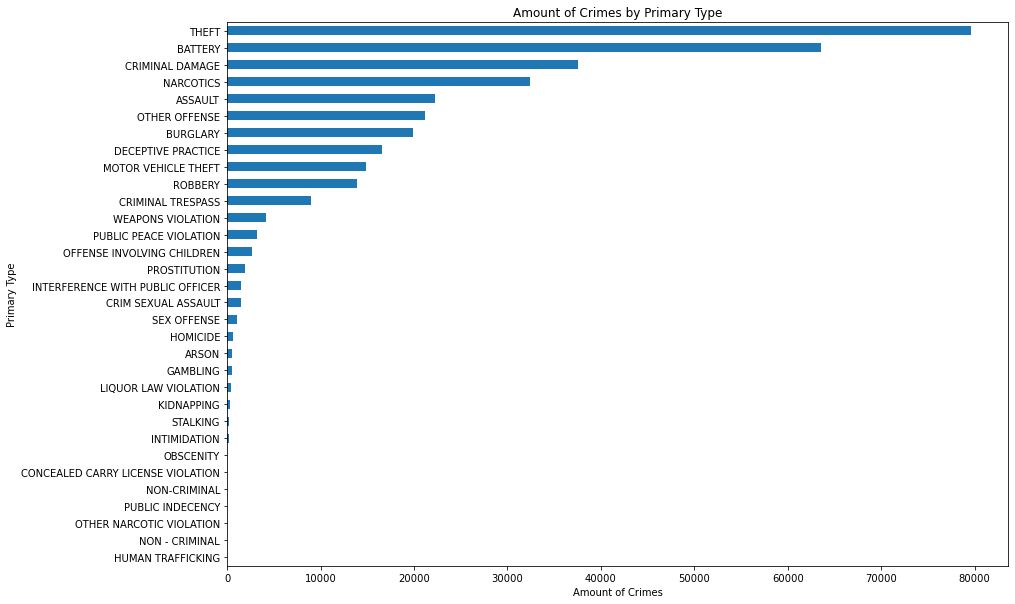

In [90]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [91]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
0,ARSON,544
9,GAMBLING,542
15,LIQUOR LAW VIOLATION,465
14,KIDNAPPING,287
29,STALKING,176
13,INTIMIDATION,164
20,OBSCENITY,40
4,CONCEALED CARRY LICENSE VIOLATION,20
19,NON-CRIMINAL,17
25,PUBLIC INDECENCY,13


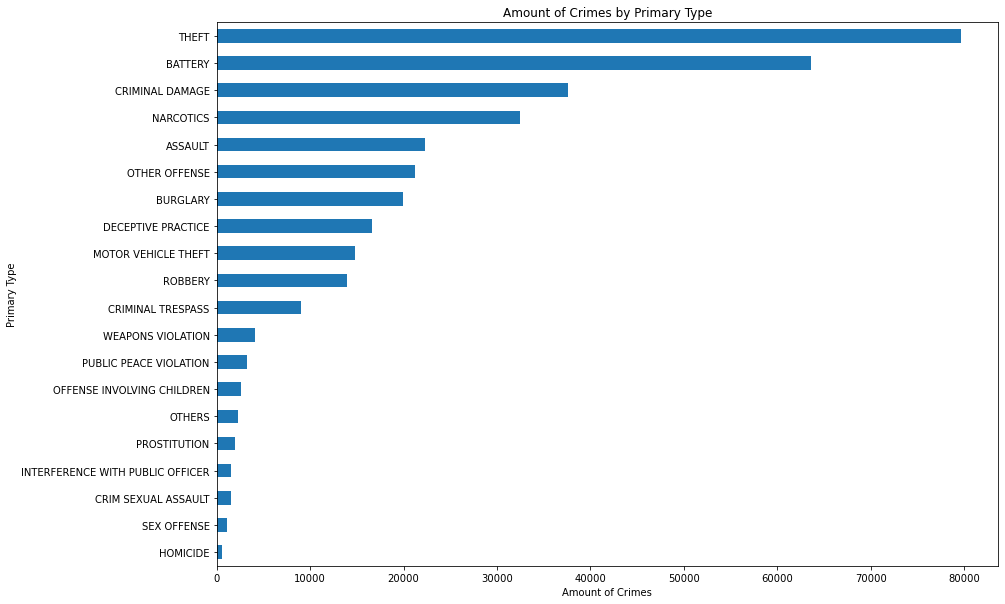

In [92]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [93]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'CRIMINAL TRESPASS', 'ASSAULT', 'BURGLARY',
       'CRIMINAL DAMAGE', 'BATTERY', 'CRIM SEXUAL ASSAULT',
       'PUBLIC PEACE VIOLATION', 'DECEPTIVE PRACTICE', 'SEX OFFENSE',
       'OTHER OFFENSE', 'NARCOTICS', 'ROBBERY', 'OTHERS', 'PROSTITUTION',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'HOMICIDE',
       'INTERFERENCE WITH PUBLIC OFFICER'], dtype=object)

In [94]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [95]:
df

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1260040,0,0,0,0,0,False,False,121,1.0,2.0,...,1898242.0,2016,41.876212,-87.641007,0,4,6,19,0,0
1203295,1,1,1,1,1,False,False,1834,18.0,42.0,...,1904895.0,2016,41.894374,-87.625439,1,1,9,4,30,0
575603,2,2,2,2,2,False,False,1234,12.0,25.0,...,1890719.0,2013,41.855794,-87.679711,2,7,19,8,20,0
950048,3,3,3,3,3,False,False,623,6.0,6.0,...,1851748.0,2014,41.748509,-87.622933,3,11,13,14,40,0
1268578,4,4,4,4,4,False,True,1914,19.0,46.0,...,1930493.0,2016,41.964798,-87.654782,4,2,14,10,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240500,15669,47,16,44,0,True,False,634,6.0,21.0,...,1843143.0,2016,41.724908,-87.625145,133712,4,19,11,59,0
535052,4608,26,15,25,0,False,False,1132,11.0,24.0,...,1895744.0,2013,41.869826,-87.723890,170333,6,4,17,30,0
1181866,8187,9,0,9,26,False,False,2232,22.0,34.0,...,1836553.0,2015,41.706926,-87.642046,11116,12,12,9,28,0
189404,7899,36,0,34,0,False,False,1114,11.0,28.0,...,1901150.0,2012,41.884674,-87.726099,120809,5,11,11,30,0


In [96]:
#Since our target variable is in the middle of our dataset, swapping it to the end - to make it look more streamlined
#define function to swap columns

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df = swap_columns(df, 'Primary Type', 'Second')

In [97]:
dfnew = df.copy()
#Creating copy of our original dataset so as to perform manipulations

In [98]:
#Getting only columns with numerical variables as for Anova F-test, we need only numerical columns
dfnew = dfnew.select_dtypes(include=np.number)
dfnew = swap_columns(dfnew, 'Primary Type', 'Second')

In [99]:
dfnew

,Block,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1260040,0,0,0,0,0,121,1.0,2.0,28.0,0,...,1898242.0,2016,41.876212,-87.641007,0,4,6,19,0,0
1203295,1,1,1,1,1,1834,18.0,42.0,8.0,1,...,1904895.0,2016,41.894374,-87.625439,1,1,9,4,30,0
575603,2,2,2,2,2,1234,12.0,25.0,31.0,2,...,1890719.0,2013,41.855794,-87.679711,2,7,19,8,20,0
950048,3,3,3,3,3,623,6.0,6.0,44.0,3,...,1851748.0,2014,41.748509,-87.622933,3,11,13,14,40,0
1268578,4,4,4,4,4,1914,19.0,46.0,3.0,4,...,1930493.0,2016,41.964798,-87.654782,4,2,14,10,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240500,15669,47,16,44,0,634,6.0,21.0,49.0,17,...,1843143.0,2016,41.724908,-87.625145,133712,4,19,11,59,0
535052,4608,26,15,25,0,1132,11.0,24.0,26.0,15,...,1895744.0,2013,41.869826,-87.723890,170333,6,4,17,30,0
1181866,8187,9,0,9,26,2232,22.0,34.0,49.0,0,...,1836553.0,2015,41.706926,-87.642046,11116,12,12,9,28,0
189404,7899,36,0,34,0,1114,11.0,28.0,26.0,0,...,1901150.0,2012,41.884674,-87.726099,120809,5,11,11,30,0


In [100]:
X = dfnew.iloc[:,:-1]
y = dfnew.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


### Using ANOVA f-test for feature selection of numerical variables

In [101]:
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [102]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.907808
Feature 1: 3.692711
Feature 2: 9.257246
Feature 3: 4.142993
Feature 4: 0.804952
Feature 5: 0.833800
Feature 6: 0.835456
Feature 7: 0.876180
Feature 8: 1.487922
Feature 9: 7.279967
Feature 10: 1.177274
Feature 11: 1.170858
Feature 12: 2.599957
Feature 13: 1.165896
Feature 14: 1.210968
Feature 15: 1.174205
Feature 16: 1.665222
Feature 17: 0.783685
Feature 18: 0.912390
Feature 19: 3.279349


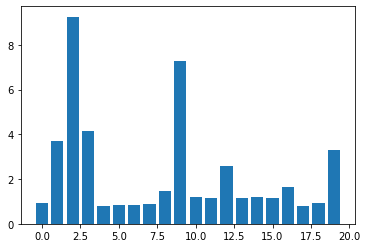

In [103]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Because of their low scores, all features except 
* Arrest
* Domestic
* Year
* Month
* Day
* Hour
* Longitude
* Latitude
* FBI Code
* Location Description are selected as important features. 


In [104]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["Arrest","Domestic","Year","Month","Day","Hour","Longitude","Latitude","FBI Code","Location Description","Block"]
print('Full Features: ', Features)
#,"FBI Code"

#Block	IUCR	Primary Type	Description	FBI Code,Location Description	Arrest	Domestic	Beat	District	Ward	...	Y Coordinate	Year	Latitude	Longitude	Location	Month	Day	Hour	Minute	Second
##
#

Full Features:  ['Arrest', 'Domestic', 'Year', 'Month', 'Day', 'Hour', 'Longitude', 'Latitude', 'FBI Code', 'Location Description', 'Block']


In [105]:
# df = df.sample(n=10000)

#### Splitting data into train and test

In [106]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Arrest', 'Domestic', 'Year', 'Month', 'Day', 'Hour', 'Longitude', 'Latitude', 'FBI Code', 'Location Description', 'Block']
Target Class        :  Primary Type
Training Set Size   :  (280000, 23)
Test Set Size       :  (70000, 23)


## Machine Learning Models

## K-NN

In [107]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [108]:
# Model Evaluation
ac_sc_knn = round(accuracy_score(y2, result), 3)
rc_sc_knn = round(recall_score(y2, result, average="weighted"), 3)
pr_sc_knn = round(precision_score(y2, result, average="weighted"), 3)
f1_sc_knn = round(f1_score(y2, result, average='micro'), 3)
confusion_knn = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc_knn)
print("Recall      : ", rc_sc_knn)
print("Precision   : ", pr_sc_knn)
print("F1 Score    : ", f1_sc_knn)
print("Confusion Matrix: ")
print(confusion_knn)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.392
Recall      :  0.392
Precision   :  0.358
F1 Score    :  0.392
Confusion Matrix: 
[[12294   517   879   591   739    84     0     1     4     0   728    18
      0     3     0     0     0     2     0     0]
 [ 1174   257   133    85    85    20     0     0     5     0    77     3
      0     0     0     0     0     1     0     0]
 [ 2224   214   689   369   504   276     0     2     2     0   187     5
      0     0     0     0     0     1     0     0]
 [ 1926   159   514   571   473   130     0     0     3     0   190     4
      0     0     0     0     0     2     0     0]
 [ 3236   280  1055   747  1391   567     7     4     0     0   209    10
      2     0     0     0     0     2     0     0]
 [  783   180  1022   766  1597  7209    20    61    42     4    35   865
     92     0     9    27     0     1     0     5]
 [   50    13    37    34    50   113     0     1     0     0     2     2
      2     0     0    

## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing

In [110]:
# Logistic Regression 
# Rescaling train and test features 
scaler1 = preprocessing.StandardScaler().fit(x1) 
scaler2 = preprocessing.StandardScaler().fit(y1) 
 
x1_scaled = scaler1.transform(x1) 
y1_scaled = scaler2.transform(y1) 
 
# Create Model with configuration  
lr_model = LogisticRegression(random_state = 0, max_iter = 1000) 
 
# Model Training 
lr_model.fit(X=x1_scaled, 
             y=x2) 
 
# Prediction 
result = lr_model.predict(y1_scaled)

In [111]:
ac_sc_lgstc = round(accuracy_score(y2, result), 3)
rc_sc_lgstc = round(recall_score(y2, result, average="weighted"), 3)
pr_sc_lgstc = round(precision_score(y2, result, average="weighted"), 3)
f1_sc_lgstc = round(f1_score(y2, result, average='micro'), 3)
confusion_lgstc = confusion_matrix(y2, result) 

print("========== Logistic Regression Results ==========") 
print("Accuracy    : ", ac_sc_lgstc) 
print("Recall      : ", rc_sc_lgstc) 
print("Precision   : ", pr_sc_lgstc) 
print("F1 Score    : ", f1_sc_lgstc) 
print("Confusion Matrix: ") 
print(confusion_lgstc)

========== Logistic Regression Results ==========
Accuracy    :  0.805
Recall      :  0.805
Precision   :  0.785
F1 Score    :  0.805
Confusion Matrix: 
[[15860     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0  1100     0     0     0     0     0     0     0     0   740     0
      0     0     0     0     0     0     0     0]
 [    0     0  1675  1600   765   414     0     9     0     0     0    10
      0     0     0     0     0     0     0     0]
 [    0     0   252  1658  2062     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0   188     0  7321     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0   358 11212     0     0     0     0     0  1148
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   296     0     0     0     0     0     8
      0     0     0    

/Users/mine/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


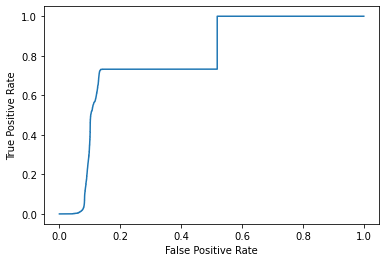

In [112]:

y_pred_proba = lr_model.predict_proba(y1_scaled)[::,1]
fpr,tpr,_= metrics.roc_curve(y2,  y_pred_proba,pos_label=2)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
metrics.auc(fpr,tpr)

0.7871340955935481

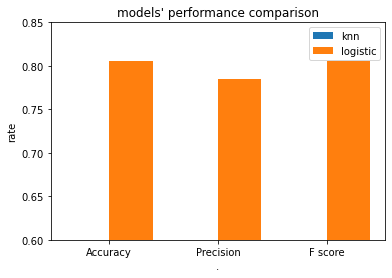

In [114]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accuracy','Precision','F score']
knn = [ac_sc_knn,pr_sc_knn,f1_sc_knn]
logistic = [ac_sc_lgstc,pr_sc_lgstc,f1_sc_lgstc]


  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, knn, 0.4, label = 'knn')
plt.bar(X_axis + 0.2, logistic, 0.4, label = 'logistic')
  
plt.xticks(X_axis, X)
plt.xlabel(".")
plt.ylabel("rate")
plt.title("models' performance comparison")
plt.legend()
plt.ylim([0.6, 0.85])
plt.show()

## Random Forest

In [48]:
df_extra = df.copy()

In [49]:
df_extra = df_extra.sample(n=10000)

In [50]:
#Split dataset to Training Set & Test Set
X, Y = train_test_split(df_extra, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

X1 = X[Features]    #Features to train
X2 = X[Target]      #Target Class to train
Y1 = Y[Features]    #Features to test
Y2 = Y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['Arrest', 'Domestic', 'Year', 'Month', 'Day', 'Hour', 'Longitude', 'Latitude', 'FBI Code', 'Location Description']
Target Class        :  Primary Type
Training Set Size   :  (280000, 23)
Test Set Size       :  (70000, 23)


In [51]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Model Training
clf.fit(X1,X2)

#Prediction
y_pred=clf.predict(Y1)

In [52]:
# Model Evaluation
ac_sc_rf = accuracy_score(Y2, y_pred)
rc_sc_rf = recall_score(Y2, y_pred, average="weighted")
pr_sc_rf = round(precision_score(Y2, y_pred, average="weighted"),3 )
f1_sc_rf = f1_score(Y2, y_pred, average='micro')
confusion_rf = confusion_matrix(Y2, y_pred)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc_rf)
print("Recall      : ", rc_sc_rf)
print("Precision   : ", pr_sc_rf)
print("F1 Score    : ", f1_sc_rf)
print("Confusion Matrix: ")
print(confusion_rf)

========== Random Forest Results ==========
Accuracy    :  0.946
Recall      :  0.946
Precision   :  0.94
F1 Score    :  0.946
Confusion Matrix: 
[[440   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  28   0   0   1   0   0   0   0   0  13   0   0   0   0   0   0   0
    0   0]
 [  0   0 127   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   3 126   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   3   0 203   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 348   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   3   0   0   0   5   0  14   0   0   2   0   0   0   0   0   0   0
    0   2]
 [  0   0   0   0   0   3   0   0 100   0   0   0   0   0   1   3   0   0
    0   0]
 [  0   0   0   0   0   3   0   1   0   2   0   1   1   0   0   0   0   0
    0   0]
 [  

/Users/mine/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


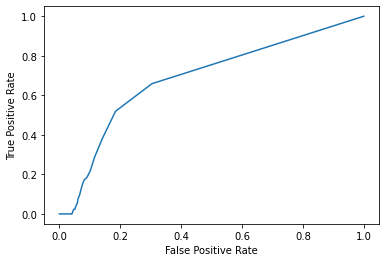

In [53]:
y_pred_proba = clf.predict_proba(Y1)[::,1]
fpr,tpr,_= metrics.roc_curve(Y2,  y_pred_proba,pos_label=2)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
metrics.auc(fpr,tpr)

0.6863427508400349

## Ada Boost

In [184]:
# Ada Boost 
# Using Decision Tree as Base Estimator as default
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X1, X2)

#Predict the response for test dataset
y_pred = model.predict(Y1)

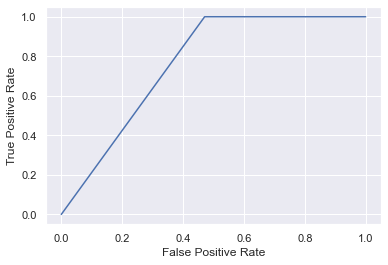

In [185]:
y_pred_proba = model.predict_proba(Y1)[::,1]
fpr,tpr,_= metrics.roc_curve(Y2,  y_pred_proba,pos_label=2)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [186]:
metrics.auc(fpr,tpr)

0.7645023948908994

In [187]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y2, y_pred))

Accuracy: 0.546


In [188]:
# Using SVC as Base Estimator
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='rbf')

In [193]:

abc =AdaBoostClassifier(n_estimators=3, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X1, X2)

#Predict the response for test dataset
y_pred = model.predict(Y1)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y2, y_pred))

Accuracy: 0.653


In [230]:
# Model Evaluation
ac_sc_abc = accuracy_score(Y2, y_pred)
rc_sc_abc = recall_score(Y2, y_pred, average="weighted")
pr_sc_abc = round(precision_score(Y2, y_pred, average="weighted"), 3)
f1_sc_abc = f1_score(Y2, y_pred, average='micro')
confusion_abc = confusion_matrix(Y2, y_pred)

print("========== SVM Results ==========")
print("Accuracy    : ", ac_sc_abc)
print("Recall      : ", rc_sc_abc)
print("Precision   : ", pr_sc_abc)
print("F1 Score    : ", f1_sc_abc)
print("Confusion Matrix: ")
print(confusion_abc)


========== SVM Results ==========
Accuracy    :  0.907
Recall      :  0.907
Precision   :  0.89
F1 Score    :  0.907
Confusion Matrix: 
[[471   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  26   0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0
    0   0]
 [  0   0  88  23   7   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  40  72   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   2   0 219   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 320   0   0   0   0   0   9   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   3   0   0   0   0   1  13   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0 106   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   2   0   0   0   0   0   0
    0   0]
 [  0   6   0 

C:\Users\kvijay7\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [231]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
 
# fitting x samples and y classes
svm_model.fit(X1, X2)

#Predict the response for test dataset
y_pred = svm_model.predict(Y1)


# Model Evaluation
ac_sc_svm = accuracy_score(Y2, y_pred)
rc_sc_svm = recall_score(Y2, y_pred, average="weighted")
pr_sc_svm = round(precision_score(Y2, y_pred, average="weighted"), 3)
f1_sc_svm = f1_score(Y2, y_pred, average='micro')
confusion_svm = confusion_matrix(Y2, y_pred)

print("========== SVM Results ==========")
print("Accuracy    : ", ac_sc_svm)
print("Recall      : ", rc_sc_svm)
print("Precision   : ", pr_sc_svm)
print("F1 Score    : ", f1_sc_svm)
print("Confusion Matrix: ")
print(confusion_svm)


========== SVM Results ==========
Accuracy    :  0.907
Recall      :  0.907
Precision   :  0.89
F1 Score    :  0.907
Confusion Matrix: 
[[471   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  26   0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0
    0   0]
 [  0   0  88  23   7   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  40  72   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   2   0 219   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 320   0   0   0   0   0   9   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   3   0   0   0   0   1  13   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0 106   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   2   0   0   0   0   0   0
    0   0]
 [  0   6   0 

C:\Users\kvijay7\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
pip install tabulate

In [207]:
from tabulate import tabulate

In [232]:
table = [['Model', 'Accuracy', 'Recall', 'Precision', 'F1'], ['Logistic', ac_sc_lgstc, rc_sc_lgstc ,pr_sc_lgstc, f1_sc_lgstc], ['K-NN',ac_sc_knn, rc_sc_knn, pr_sc_knn,f1_sc_knn], ['Ada Boost', ac_sc_abc, rc_sc_abc, pr_sc_abc, f1_sc_abc], ['SVM', ac_sc_svm, rc_sc_svm, pr_sc_svm, f1_sc_svm], ['Random Forest', ac_sc_rf, rc_sc_rf , pr_sc_rf, f1_sc_rf]]

In [234]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═══════════════╤════════════╤══════════╤═════════════╤═══════╕
│ Model         │   Accuracy │   Recall │   Precision │    F1 │
╞═══════════════╪════════════╪══════════╪═════════════╪═══════╡
│ Logistic      │      0.803 │    0.803 │       0.783 │ 0.803 │
├───────────────┼────────────┼──────────┼─────────────┼───────┤
│ K-NN          │      0.803 │    0.803 │       0.783 │ 0.803 │
├───────────────┼────────────┼──────────┼─────────────┼───────┤
│ Ada Boost     │      0.907 │    0.907 │       0.89  │ 0.907 │
├───────────────┼────────────┼──────────┼─────────────┼───────┤
│ SVM           │      0.907 │    0.907 │       0.89  │ 0.907 │
├───────────────┼────────────┼──────────┼─────────────┼───────┤
│ Random Forest │      0.907 │    0.907 │       0.89  │ 0.907 │
╘═══════════════╧════════════╧══════════╧═════════════╧═══════╛


### Unsupervised Learning

In [59]:
# #Unsupervised Learning
# #K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

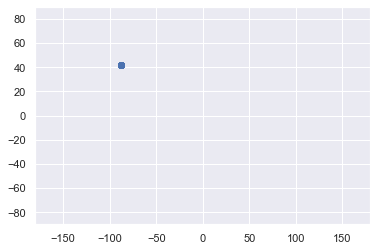

In [60]:
#Plotting the data
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [61]:
#Selecting the feature
x = df.iloc[:,21:23] # 1t for rows and second for columns
x

,Minute,Primary Type
1054303,30,15
889116,8,5
454991,0,3
1312012,30,5
1077659,35,11
...,...,...
463007,45,11
731506,30,0
313882,30,0
1033778,0,17


In [62]:
#Clustering
kmeans = KMeans(3)
kmeans.fit(x1)

KMeans(n_clusters=3)

In [63]:
#Clustering Results
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, ..., 1, 0, 0])

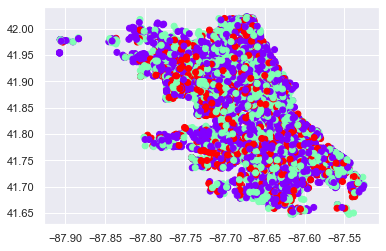

In [64]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

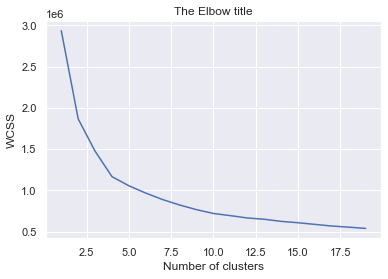

In [65]:
wcss=[]
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [55]:
Head

NameError: name 'head' is not defined

In [56]:
df.head(y_pred)

TypeError: cannot do positional indexing on Int64Index with these indexers [[ 0 17 10 ...  5  0  5]] of type ndarray

In [57]:
print(y_pred)

[ 0 17 10 ...  5  0  5]


In [58]:
df_extra.head(10)

,Block,IUCR,Second,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Primary Type
193852,3322,52,0,49,3,False,False,513,5.0,9.0,...,1834091.0,2012,41.699999,-87.614341,3771,5,15,10,0,8
643792,43,70,0,67,0,True,False,931,9.0,20.0,...,1873509.0,2013,41.808526,-87.672888,29711,10,2,19,45,14
755908,1109,66,0,63,47,False,False,815,8.0,23.0,...,1870231.0,2014,41.799809,-87.723351,17502,3,10,16,18,1
702696,9536,12,0,2,63,False,False,423,4.0,10.0,...,1845691.0,2013,41.731431,-87.552670,13777,12,17,14,30,5
986245,25317,24,0,23,0,False,False,633,6.0,6.0,...,1845020.0,2015,41.730019,-87.618612,123212,3,20,9,0,4
1124296,10250,24,0,23,0,False,True,815,8.0,23.0,...,1873053.0,2015,41.807646,-87.741110,37904,9,20,23,0,4
1278407,13676,33,0,32,0,True,True,711,7.0,20.0,...,1866416.0,2016,41.788830,-87.634020,46658,6,1,1,23,2
1048694,22645,92,0,88,5,True,False,2511,25.0,29.0,...,1919647.0,2015,41.935692,-87.777176,68876,6,13,1,41,5
853176,7066,9,0,9,8,False,False,1233,12.0,2.0,...,1894846.0,2014,41.866989,-87.657205,37187,7,13,9,18,0
852625,530,0,0,0,2,False,False,1834,18.0,42.0,...,1904058.0,2014,41.891990,-87.611462,538,7,11,15,50,0


In [59]:
df_extra["prediction"] = y_pred
df_extra.head(10)

ValueError: Length of values (2000) does not match length of index (10000)

In [60]:
df11 = pd.(Y2)
head(df11)

SyntaxError: invalid syntax (4269894321.py, line 1)

In [61]:
head(Y2)

NameError: name 'head' is not defined

In [62]:
Y2.head(10)

805928      0
832199     17
1358292    10
828430      0
104011      0
921515      8
99286       2
1235056     5
962699      2
1269649    15
Name: Primary Type, dtype: int64

In [63]:
Y1.head(10)

,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description
805928,False,False,2014,5,10,22,-87.685759,41.767380,0,0
832199,True,True,2014,6,18,5,-87.696987,41.851887,23,4
1358292,False,False,2016,9,7,14,-87.755444,41.882363,1,28
828430,False,False,2014,6,12,16,-87.737692,41.921485,0,0
104011,True,False,2012,2,2,17,-87.653392,41.888654,0,18
921515,False,False,2014,10,5,22,-87.626020,41.875369,16,6
99286,False,False,2012,1,30,8,-87.537358,41.688218,2,13
1235056,False,True,2016,3,5,21,-87.551941,41.749212,9,3
962699,False,False,2014,12,3,9,-87.750808,41.889351,5,0
1269649,False,False,2016,4,22,18,-87.738343,41.941631,15,0


In [64]:
Y1["Primary_type"] = Y2
Y1.head(10)

/var/folders/b6/89bshl6x2hlcn5s5dy96xq_r0000gn/T/ipykernel_1523/335033884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1["Primary_type"] = Y2


,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description,Primary_type
805928,False,False,2014,5,10,22,-87.685759,41.767380,0,0,0
832199,True,True,2014,6,18,5,-87.696987,41.851887,23,4,17
1358292,False,False,2016,9,7,14,-87.755444,41.882363,1,28,10
828430,False,False,2014,6,12,16,-87.737692,41.921485,0,0,0
104011,True,False,2012,2,2,17,-87.653392,41.888654,0,18,0
921515,False,False,2014,10,5,22,-87.626020,41.875369,16,6,8
99286,False,False,2012,1,30,8,-87.537358,41.688218,2,13,2
1235056,False,True,2016,3,5,21,-87.551941,41.749212,9,3,5
962699,False,False,2014,12,3,9,-87.750808,41.889351,5,0,2
1269649,False,False,2016,4,22,18,-87.738343,41.941631,15,0,15


In [65]:
Y1["prediction"] = y_pred
Y1.head(10)

/var/folders/b6/89bshl6x2hlcn5s5dy96xq_r0000gn/T/ipykernel_1523/2942660665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1["prediction"] = y_pred


,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description,Primary_type,prediction
805928,False,False,2014,5,10,22,-87.685759,41.767380,0,0,0,0
832199,True,True,2014,6,18,5,-87.696987,41.851887,23,4,17,17
1358292,False,False,2016,9,7,14,-87.755444,41.882363,1,28,10,10
828430,False,False,2014,6,12,16,-87.737692,41.921485,0,0,0,0
104011,True,False,2012,2,2,17,-87.653392,41.888654,0,18,0,0
921515,False,False,2014,10,5,22,-87.626020,41.875369,16,6,8,8
99286,False,False,2012,1,30,8,-87.537358,41.688218,2,13,2,2
1235056,False,True,2016,3,5,21,-87.551941,41.749212,9,3,5,5
962699,False,False,2014,12,3,9,-87.750808,41.889351,5,0,2,2
1269649,False,False,2016,4,22,18,-87.738343,41.941631,15,0,15,15


In [115]:
y1["Primary_type"] = y2
y1.head(10)

/var/folders/b6/89bshl6x2hlcn5s5dy96xq_r0000gn/T/ipykernel_1523/4260232365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1["Primary_type"] = y2


,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description,Block,Primary_type
1276629,False,False,2016,5,1,5,-87.623770,41.736313,13,5,6653,12
733137,True,False,2014,2,3,10,-87.625105,41.736277,16,17,1766,8
708368,False,False,2013,12,26,4,-87.713921,41.784256,0,0,19426,0
958467,False,False,2014,11,7,11,-87.727335,41.944301,1,14,11781,10
580951,False,False,2013,7,24,23,-87.644803,41.780364,4,2,15257,4
1437952,False,False,2016,12,23,13,-87.643336,41.726045,18,3,7677,8
352366,False,False,2012,10,27,4,-87.627192,41.710291,4,0,15173,4
59837,False,False,2015,2,23,8,-87.713981,41.787898,13,5,4831,12
704217,True,False,2013,12,19,18,-87.666331,41.864627,12,2,10568,11
1421196,False,False,2016,11,25,23,-87.622655,41.771019,0,4,8389,0


In [119]:
y1["prediction"] = result
y1.head(10)


/var/folders/b6/89bshl6x2hlcn5s5dy96xq_r0000gn/T/ipykernel_1523/4010731042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1["prediction"] = result


,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description,Block,Primary_type,prediction
1276629,False,False,2016,5,1,5,-87.623770,41.736313,13,5,6653,12,12
733137,True,False,2014,2,3,10,-87.625105,41.736277,16,17,1766,8,16
708368,False,False,2013,12,26,4,-87.713921,41.784256,0,0,19426,0,0
958467,False,False,2014,11,7,11,-87.727335,41.944301,1,14,11781,10,10
580951,False,False,2013,7,24,23,-87.644803,41.780364,4,2,15257,4,4
1437952,False,False,2016,12,23,13,-87.643336,41.726045,18,3,7677,8,8
352366,False,False,2012,10,27,4,-87.627192,41.710291,4,0,15173,4,4
59837,False,False,2015,2,23,8,-87.713981,41.787898,13,5,4831,12,12
704217,True,False,2013,12,19,18,-87.666331,41.864627,12,2,10568,11,11
1421196,False,False,2016,11,25,23,-87.622655,41.771019,0,4,8389,0,0


In [141]:
y1["Block"] = BlockSeries[y1.index]

/var/folders/b6/89bshl6x2hlcn5s5dy96xq_r0000gn/T/ipykernel_1523/1906785001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1["Block"] = BlockSeries[y1.index]


In [142]:
y1

,Arrest,Domestic,Year,Month,Day,Hour,Longitude,Latitude,FBI Code,Location Description,Block,Primary_type,prediction
1276629,False,False,2016,5,1,5,-87.623770,41.736313,13,5,0000X E 87TH ST,12,12
733137,True,False,2014,2,3,10,-87.625105,41.736277,16,17,0000X W 87TH ST,8,16
708368,False,False,2013,12,26,4,-87.713921,41.784256,0,0,036XX W 60TH ST,0,0
958467,False,False,2014,11,7,11,-87.727335,41.944301,1,14,034XX N PULASKI RD,10,10
580951,False,False,2013,7,24,23,-87.644803,41.780364,4,2,062XX S HALSTED ST,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154600,False,False,2015,11,1,14,-87.753843,41.876672,9,52,051XX W JACKSON BLVD,5,5
439457,False,True,2013,2,10,8,-87.774158,41.909270,6,5,059XX W NORTH AVE,5,5
781543,False,False,2014,4,12,23,-87.611873,41.691874,0,18,004XX E 111TH PL,0,0
1369828,False,False,2016,9,21,23,-87.666900,41.922224,4,0,022XX N DOMINICK ST,4,4


In [ ]:
y1

In [118]:
new_column_values = ['val1','val2','val3','val4','val5']

df["new_Column"] = new_column_values 


#'THEFT'=0 
#'CRIMINAL TRESPASS'=1
#'ASSAULT'=2
#'BURGLARY'=3
#'CRIMINAL DAMAGE'=4
#'BATTERY'=5
#'CRIM SEXUAL ASSAULT'=6
#'PUBLIC PEACE VIOLATION'=7
#'DECEPTIVE PRACTICE'=8 
#'SEX OFFENSE'=9
#'OTHER OFFENSE'=10
#'NARCOTICS'=11
#'ROBBERY'=12
#'OTHERS'=13
#'PROSTITUTION'=14
# 'MOTOR VEHICLE THEFT'=15
#'WEAPONS VIOLATION'=16
#'OFFENSE INVOLVING CHILDREN'=17
#'HOMICIDE'=18
#'INTERFERENCE WITH PUBLIC OFFICER'=19


IndentationError: unexpected indent (3920680546.py, line 16)